In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
MonthyData = pd.read_csv("Month Wise FTA.csv")

In [24]:
AreaWise= pd.read_csv("Circle Wise Data1.csv")

In [25]:
fee= pd.read_csv("FEE.csv")

In [26]:
AgeWise= pd.read_csv("FTA Age Wise Distribution.csv")

In [47]:
TotalTouristAraival= pd.read_csv("FTA Arrival in India.csv")

In [28]:
StateWise= pd.read_csv("State Wise.csv")

In [44]:
TotalTouristAraival.head(15)

,Year,FTAs in India (in Million),Percentage (%) change over previous year,NRIs arrivals in India (in million),Percentage (%) change over the previous year,International Tourist Arrivals in India (in million),Percentage (%) change over the previous year.1
0,1981,1.28,2.0,NaN,NaN,NaN,NaN
1,1991,1.68,-1.7,NaN,NaN,NaN,NaN
2,2001,2.54,-4.2,NaN,NaN,NaN,NaN
3,2002,2.38,-6.0,NaN,NaN,NaN,NaN
4,2003,2.73,14.3,NaN,NaN,NaN,NaN
5,2004,3.46,26.8,NaN,NaN,NaN,NaN
6,2005,3.92,13.3,NaN,NaN,NaN,NaN
7,2006,4.45,13.5,NaN,NaN,NaN,NaN
8,2007,5.08,14.3,NaN,NaN,NaN,NaN
9,2008,5.28,4.0,NaN,NaN,NaN,NaN


In [45]:
# TotalTouristAraival2=TotalTouristAraival.drop(index=TotalTouristAraival.index[:15], axis=0, inplace=True)


In [48]:
TotalTouristAraival.head()

,Year,FTAs in India (in Million),Percentage (%) change over previous year,NRIs arrivals in India (in million),Percentage (%) change over the previous year,International Tourist Arrivals in India (in million),Percentage (%) change over the previous year.1
0,1981,1.28,2.0,NaN,NaN,NaN,NaN
1,1991,1.68,-1.7,NaN,NaN,NaN,NaN
2,2001,2.54,-4.2,NaN,NaN,NaN,NaN
3,2002,2.38,-6.0,NaN,NaN,NaN,NaN
4,2003,2.73,14.3,NaN,NaN,NaN,NaN


In [55]:
MonthyData.head()

,Months,2015,2016,2017,2018,2019,2020,2021,Growth 2020/19 (%),Growth 2021/20 (%)
0,January,605918,599518,655540,452236,440907,611702,486338,38.74,-20.49
1,February,439884,443710,453336,453298,402203,495109,431118,23.10,-12.92
2,March,463645,483445,481213,504091,484602,287681,479317,-40.64,66.61
3,April,460423,466079,482423,496531,507704,233,413089,-99.95,177191.42
4,May,473658,437574,448288,529423,618600,25760,204898,-95.84,695.41


In [56]:
AreaWise.head()

,Circle,Name of the Monument,Foreign-2019-20,Foreign-2020-21,% Growth 2021-21/2019-20-Foreign
0,Agra,Taj Mahal,645415,9034,-98.60
1,Agra,Agra Fort,386522,2810,-99.27
2,Agra,Fatehpur Sikri,184751,574,-99.69
3,Agra,Akbar Tomb Sikandra,19625,321,-98.36
4,Agra,Mariam tomb Sikandra,414,31,-92.51


In [58]:
fee.head()

,Year,FEE in terms - Crore,FEE in terms - % Change over previous year,FEE in US$ terms - US $ Million,FEE in US$ terms - % Change over previous year
0,1991,4318,NaN,1861,NaN
1,2001,15083,-3.5,3198,-7.6
2,2002,15064,-0.1,3103,-3.0
3,2003,20729,37.6,4463,43.8
4,2004,27944,34.8,6170,38.2


In [59]:
AgeWise.head()

,Year,FTAs,% distribution by Age- Group (in years) - 0-14,% distribution by Age- Group (in years) - 15-24,% distribution by Age- Group (in years) - 25-34,% distribution by Age- Group (in years) - 35-44,% distribution by Age- Group (in years) - 45-54,% distribution by Age- Group (in years) - 55-64,% distribution by Age- Group (in years) - 65 & above,% distribution by Age- Group (in years) - Not Reported
0,2001,2537282,7.0,10.8,20.1,21.1,19.4,11.9,6.7,3.0
1,2002,2384364,9.2,10.0,19.4,21.6,19.4,11.5,7.7,1.2
2,2003,2726214,7.2,10.0,19.5,21.6,19.4,11.5,7.7,3.1
3,2004,3457477,8.5,9.8,18.8,21.3,19.4,12.8,8.2,0.2
4,2005,3918610,8.6,9.6,18.8,21.3,19.5,13.0,8.7,0.5


In [60]:
StateWise.head()

,Sl. No.,States/UT,DTV 2021,FTV 2021
0,1,Tamil Nadu,115336719,57622
1,2,Uttar Pradesh,109708435,44737
2,3,Andhra Pradesh,93277569,27551
3,4,Karnataka,81333659,72487
4,5,Maharashtra,43569238,185643


In [50]:
xx=TotalTouristAraival['Year']
yy=TotalTouristAraival['FTAs in India (in Million)']

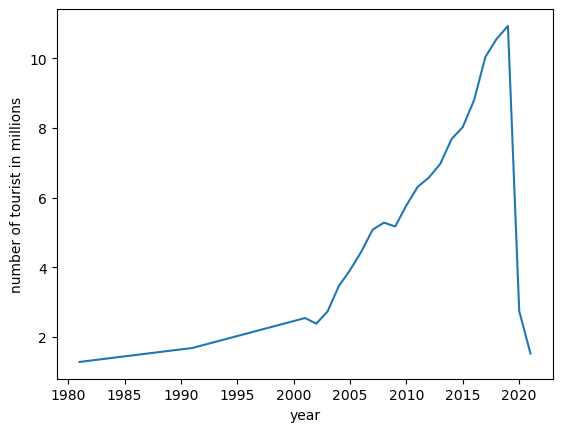

In [53]:
plt.plot(xx, yy)
plt.xlabel('year')
plt.ylabel('number of tourist in millions')
plt.show()